# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [28]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\NelsonWork\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


First, create some useful functions

In [29]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

def measure_model_perf(model, X_test, Y_test, history, title):
    score = model.evaluate(X_test, Y_test, verbose=1)
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.title(title + ' Test accuracy: ' + str(round(score[1] * 100, 2)) + '%')
    pl.legend()
    pl.grid()
    pl.savefig('../output/fashion/' + title + '.png', dpi=500)

Load the `mnist` dataset and normalize in the range [0, 1]

In [30]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the CNN and show its architecture

In [7]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0     

Define some constants and train de CNN

In [8]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 31s 61ms/step - loss: 0.5087 - accuracy: 0.8480 - val_loss: 0.1500 - val_accuracy: 0.9557
Epoch 2/10
469/469 [==============================] - 28s 59ms/step - loss: 0.1415 - accuracy: 0.9568 - val_loss: 0.0973 - val_accuracy: 0.9694
Epoch 3/10
469/469 [==============================] - 29s 62ms/step - loss: 0.0981 - accuracy: 0.9700 - val_loss: 0.0762 - val_accuracy: 0.9754
Epoch 4/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.0675 - val_accuracy: 0.9793
Epoch 5/10
469/469 [==============================] - 39s 82ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0572 - val_accuracy: 0.9805
Epoch 6/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0569 - accuracy: 0.9822 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 7/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0718 - val_accuracy:

Show the performance of the model

313/313 [==============================] - 2s 6ms/step - loss: 0.0461 - accuracy: 0.9849


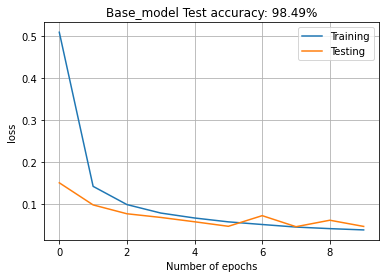

In [9]:
title = 'Base_model'

measure_model_perf(model, X_test, Y_test, history, title)

Confusion matrix

469/469 [==============================] - 34s 72ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0514 - val_accuracy: 0.9889
Epoch 39/50
469/469 [==============================] - 33s 71ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0634 - val_accuracy: 0.9876
Epoch 40/50
469/469 [==============================] - 38s 82ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0596 - val_accuracy: 0.9883
Epoch 41/50
469/469 [==============================] - 39s 84ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0588 - val_accuracy: 0.9880
Epoch 42/50
469/469 [==============================] - 39s 83ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0604 - val_accuracy: 0.9878
Epoch 43/50
469/469 [==============================] - 39s 83ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0610 - val_accuracy: 0.9892
Epoch 44/50
469/469 [==============================] - 38s 82ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0568 - val_accuracy: 0.98

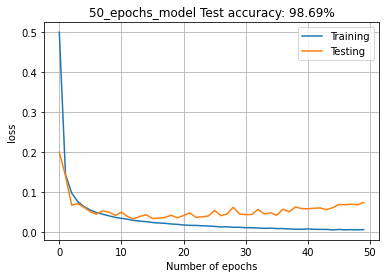

Epoch 1/50
469/469 [==============================] - 39s 81ms/step - loss: 0.4384 - accuracy: 0.8716 - val_loss: 0.1454 - val_accuracy: 0.9562
Epoch 2/50
469/469 [==============================] - 38s 81ms/step - loss: 0.1222 - accuracy: 0.9623 - val_loss: 0.1011 - val_accuracy: 0.9681
Epoch 3/50
469/469 [==============================] - 38s 80ms/step - loss: 0.0867 - accuracy: 0.9728 - val_loss: 0.0640 - val_accuracy: 0.9794
Epoch 4/50
469/469 [==============================] - 38s 81ms/step - loss: 0.0699 - accuracy: 0.9786 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 5/50
469/469 [==============================] - 39s 82ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0491 - val_accuracy: 0.9843
Epoch 6/50
469/469 [==============================] - 33s 71ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0627 - val_accuracy: 0.9816
Epoch 7/50
469/469 [==============================] - 38s 81ms/step - loss: 0.0467 - accuracy: 0.9858 - val_loss: 0.0416 - val_accuracy:

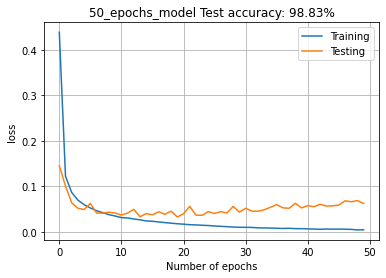

In [12]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = '50_epochs_model'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 37s 76ms/step - loss: 0.3661 - accuracy: 0.8897 - val_loss: 0.1323 - val_accuracy: 0.9634
Epoch 2/20
469/469 [==============================] - 37s 80ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.0647 - val_accuracy: 0.9797
Epoch 3/20
469/469 [==============================] - 35s 75ms/step - loss: 0.0575 - accuracy: 0.9819 - val_loss: 0.0579 - val_accuracy: 0.9808
Epoch 4/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0561 - val_accuracy: 0.9836
Epoch 5/20
469/469 [==============================] - 37s 79ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 6/20
469/469 [==============================] - 39s 83ms/step - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0340 - val_accuracy: 0.9889
Epoch 7/20
469/469 [==============================] - 37s 80ms/step - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0490 - val_accuracy:

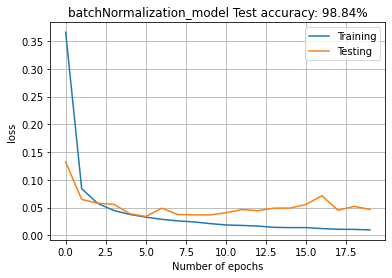

In [21]:
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_bn = BatchNormalization(name='l1_bn')(l1)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1_bn)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_bn = BatchNormalization(name='l3_bn')(l3)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3_bn)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'batchNormalization_model'

measure_model_perf(model, X_test, Y_test, history, title)

469/469 [==============================] - 46s 99ms/step - loss: 0.1121 - accuracy: 0.9645 - val_loss: 0.0381 - val_accuracy: 0.9875
Epoch 8/20
469/469 [==============================] - 53s 114ms/step - loss: 0.1053 - accuracy: 0.9667 - val_loss: 0.0441 - val_accuracy: 0.9837
Epoch 9/20
469/469 [==============================] - 56s 119ms/step - loss: 0.0994 - accuracy: 0.9678 - val_loss: 0.0340 - val_accuracy: 0.9883
Epoch 10/20
469/469 [==============================] - 47s 101ms/step - loss: 0.0960 - accuracy: 0.9693 - val_loss: 0.0320 - val_accuracy: 0.9884
Epoch 11/20
469/469 [==============================] - 45s 95ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.0347 - val_accuracy: 0.9879
Epoch 12/20
469/469 [==============================] - 43s 92ms/step - loss: 0.0930 - accuracy: 0.9708 - val_loss: 0.0369 - val_accuracy: 0.9872
Epoch 13/20
469/469 [==============================] - 38s 81ms/step - loss: 0.0881 - accuracy: 0.9719 - val_loss: 0.0297 - val_accuracy: 0.9

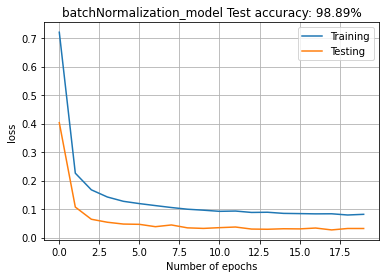

Epoch 1/20
469/469 [==============================] - 58s 119ms/step - loss: 0.7787 - accuracy: 0.7401 - val_loss: 0.3392 - val_accuracy: 0.9092
Epoch 2/20
469/469 [==============================] - 57s 122ms/step - loss: 0.2342 - accuracy: 0.9253 - val_loss: 0.1031 - val_accuracy: 0.9684
Epoch 3/20
469/469 [==============================] - 56s 119ms/step - loss: 0.1777 - accuracy: 0.9439 - val_loss: 0.0742 - val_accuracy: 0.9753
Epoch 4/20
469/469 [==============================] - 56s 120ms/step - loss: 0.1513 - accuracy: 0.9524 - val_loss: 0.0587 - val_accuracy: 0.9802
Epoch 5/20
469/469 [==============================] - 56s 119ms/step - loss: 0.1347 - accuracy: 0.9575 - val_loss: 0.0508 - val_accuracy: 0.9823
Epoch 6/20
469/469 [==============================] - 56s 120ms/step - loss: 0.1202 - accuracy: 0.9624 - val_loss: 0.0478 - val_accuracy: 0.9837
Epoch 7/20
469/469 [==============================] - 56s 120ms/step - loss: 0.1114 - accuracy: 0.9646 - val_loss: 0.0450 - val_ac

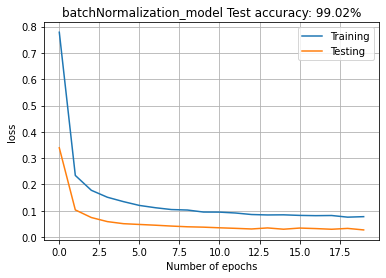

In [16]:
from keras.layers import BatchNormalization

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_bn = BatchNormalization(name='l1_bn')(l1)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1_bn)
l1_d = Dropout(0.3)(l1_mp)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_d)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_d)
l3_bn = BatchNormalization(name='l3_bn')(l3)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3_bn)
l3_d = Dropout(0.3)(l3_mp)

flat = Flatten(name='flat')(l3_d)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'batchNormalization_model'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 49s 100ms/step - loss: 0.9294 - accuracy: 0.6848 - val_loss: 1.1539 - val_accuracy: 0.6204
Epoch 2/20
469/469 [==============================] - 54s 114ms/step - loss: 0.2623 - accuracy: 0.9164 - val_loss: 0.1020 - val_accuracy: 0.9650
Epoch 3/20
469/469 [==============================] - 53s 113ms/step - loss: 0.1897 - accuracy: 0.9404 - val_loss: 0.0857 - val_accuracy: 0.9715
Epoch 4/20
469/469 [==============================] - 54s 115ms/step - loss: 0.1576 - accuracy: 0.9502 - val_loss: 0.0650 - val_accuracy: 0.9785
Epoch 5/20
469/469 [==============================] - 54s 114ms/step - loss: 0.1408 - accuracy: 0.9551 - val_loss: 0.0553 - val_accuracy: 0.9818
Epoch 6/20
469/469 [==============================] - 53s 113ms/step - loss: 0.1262 - accuracy: 0.9596 - val_loss: 0.0528 - val_accuracy: 0.9828
Epoch 7/20
469/469 [==============================] - 53s 114ms/step - loss: 0.1194 - accuracy: 0.9637 - val_loss: 0.0575 - val_ac

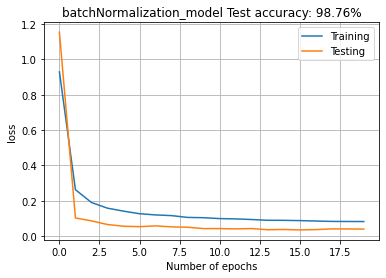

In [18]:
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_bn = BatchNormalization(name='l1_bn')(l1)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1_bn)
l1_d = Dropout(0.3)(l1_mp)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_d)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_d)
l3_bn = BatchNormalization(name='l3_bn')(l3)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3_bn)
l3_d = Dropout(0.3)(l3_mp)

flat = Flatten(name='flat')(l3_d)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'batchNormalization_model'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 80s 168ms/step - loss: 0.6855 - accuracy: 0.7714 - val_loss: 0.5008 - val_accuracy: 0.8488
Epoch 2/20
469/469 [==============================] - 80s 171ms/step - loss: 0.1583 - accuracy: 0.9524 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 3/20
469/469 [==============================] - 82s 174ms/step - loss: 0.1106 - accuracy: 0.9665 - val_loss: 0.0487 - val_accuracy: 0.9847
Epoch 4/20
469/469 [==============================] - 84s 180ms/step - loss: 0.0891 - accuracy: 0.9733 - val_loss: 0.0491 - val_accuracy: 0.9840
Epoch 5/20
469/469 [==============================] - 81s 172ms/step - loss: 0.0766 - accuracy: 0.9766 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 6/20
469/469 [==============================] - 80s 171ms/step - loss: 0.0705 - accuracy: 0.9782 - val_loss: 0.0383 - val_accuracy: 0.9873
Epoch 7/20
469/469 [==============================] - 78s 167ms/step - loss: 0.0652 - accuracy: 0.9801 - val_loss: 0.0349 - val_ac

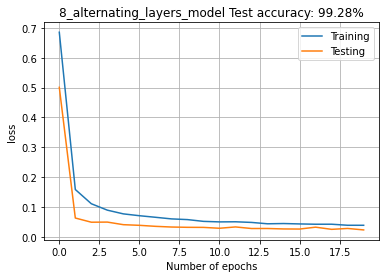

In [22]:
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l3')(l2_d)

l4 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l4')(l3)
l4_bn = BatchNormalization(name='l4_bn')(l4)
l4_mp = MaxPooling2D(pool_size=(2, 2), name='l4_mp')(l4_bn)
l4_d = Dropout(0.3)(l4_mp)

l5 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l5')(l4_d)


l6 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l6')(l5)
l6_bn = BatchNormalization(name='l6_bn')(l6)
l6_mp = MaxPooling2D(pool_size=(2, 2), name='l6_mp')(l6_bn)
l6_d = Dropout(0.3)(l6_mp)


flat = Flatten(name='flat')(l6_d)

l7 = Dense(25, activation='relu', name='l7')(flat)

l8 = Dense(n_classes, activation='softmax', name='l8')(l7)

model = Model(inputs=l0, outputs=l8)

batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = '8_alternating_layers_model'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/20
469/469 [==============================] - 171s 363ms/step - loss: 0.2422 - accuracy: 0.9244 - val_loss: 0.1164 - val_accuracy: 0.9688
Epoch 2/20
469/469 [==============================] - 147s 313ms/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 3/20
469/469 [==============================] - 145s 310ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0509 - val_accuracy: 0.9851
Epoch 4/20
469/469 [==============================] - 161s 343ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0256 - val_accuracy: 0.9911
Epoch 5/20
469/469 [==============================] - 187s 399ms/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 0.0417 - val_accuracy: 0.9871
Epoch 6/20
469/469 [==============================] - 275s 587ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0230 - val_accuracy: 0.9925
Epoch 7/20
469/469 [==============================] - 270s 575ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0252 -

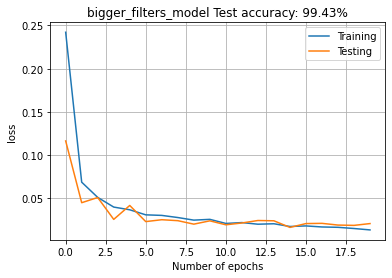

In [23]:
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l1')(l0)

l2 = Conv2D(16, (5, 5), padding='same', activation='relu', name='l2')(l1)
l2_bn = BatchNormalization(name='l2_bn')(l2)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2_bn)
l2_d = Dropout(0.3)(l2_mp)

l3 = Conv2D(32, (5, 5), padding='same', activation='relu', name='l3')(l2_d)

l4 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l4')(l3)
l4_bn = BatchNormalization(name='l4_bn')(l4)
l4_mp = MaxPooling2D(pool_size=(2, 2), name='l4_mp')(l4_bn)
l4_d = Dropout(0.3)(l4_mp)

l5 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l5')(l4_d)


l6 = Conv2D(64, (5, 5), padding='same', activation='relu', name='l6')(l5)
l6_bn = BatchNormalization(name='l6_bn')(l6)
l6_mp = MaxPooling2D(pool_size=(2, 2), name='l6_mp')(l6_bn)
l6_d = Dropout(0.3)(l6_mp)


flat = Flatten(name='flat')(l6_d)

l7 = Dense(64, activation='relu', name='l7')(flat)

l8 = Dense(n_classes, activation='softmax', name='l8')(l7)

model = Model(inputs=l0, outputs=l8)

batch_size = 128
n_epoch = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'bigger_filters_model'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/50
469/469 [==============================] - 59s 115ms/step - loss: 0.2260 - accuracy: 0.9289 - val_loss: 0.0523 - val_accuracy: 0.9824
Epoch 2/50
469/469 [==============================] - 56s 119ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0341 - val_accuracy: 0.9884
Epoch 3/50
469/469 [==============================] - 52s 111ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 4/50
469/469 [==============================] - 52s 111ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0270 - val_accuracy: 0.9915
Epoch 5/50
469/469 [==============================] - 52s 112ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0351 - val_accuracy: 0.9889
Epoch 6/50
469/469 [==============================] - 53s 112ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 7/50
469/469 [==============================] - 51s 108ms/step - loss: 0.0121 - accuracy: 0.9962 - val_loss: 0.0319 - val_ac

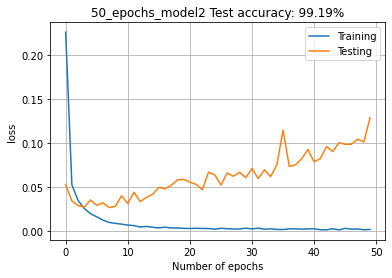

In [26]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(128, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = '50_epochs_model2'

measure_model_perf(model, X_test, Y_test, history, title)

Epoch 1/10
469/469 [==============================] - 96s 202ms/step - loss: 0.2297 - accuracy: 0.9297 - val_loss: 0.0588 - val_accuracy: 0.9802
Epoch 2/10
469/469 [==============================] - 90s 191ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0345 - val_accuracy: 0.9891
Epoch 3/10
469/469 [==============================] - 92s 196ms/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0292 - val_accuracy: 0.9907
Epoch 4/10
469/469 [==============================] - 76s 163ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0325 - val_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 79s 168ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 82s 175ms/step - loss: 0.0185 - accuracy: 0.9939 - val_loss: 0.0296 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 76s 162ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0404 - val_ac

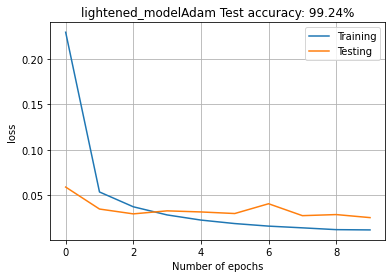

In [31]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(32, (3, 3), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(64, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(128, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)

batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

title = 'lightened_modelAdam'

measure_model_perf(model, X_test, Y_test, history, title)

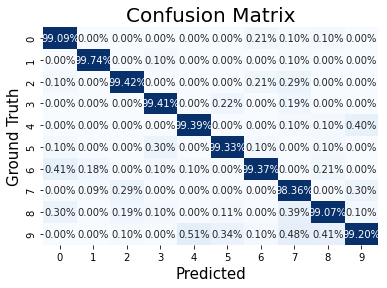

In [32]:
import seaborn as sn
import pandas as pd

pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)


df_cm = pd.DataFrame(me.confusion_matrix(y_test, pred))
ax = sn.heatmap(df_cm/np.sum(df_cm), annot=True,
            fmt='.2%', cmap='Blues', vmax=0.05, cbar=False)

pl.title('Confusion Matrix', fontsize = 20) # title with fontsize 20
pl.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
pl.ylabel('Ground Truth', fontsize = 15) # y-axis label with fontsize 15

pl.show()